
## 航空宇宙情報システム学第二

<h1><center> 第12回 非線形最小二乗法 </center> </h1>

<center>

2023年7月4日

担当教員: 矢入健久

e-mail: yairi@g.ecc.u-tokyo.ac.jp
</center>




# はじめに

前回は制約なし最適化の話をしました。今回は再び最小二乗法、ただし、パラメータがモデルに対して線形でない場合、すなわち、非線形の最小二乗法を扱います。

## 復習: 最小二乗法(least squares method)

まず、そもそも一般の最小二乗法がどういう問題だったかを復習しておきます。

今、$N$個のデータ点 $(\boldsymbol{x}_0,y_0),(\boldsymbol{x}_1,y_1),\cdots,(\boldsymbol{x}_{N-1},y_{N-1})$があるとします。
そして、このデータにできるだけ良く当てはまるような関数 $y=f(\boldsymbol{x};\boldsymbol{\alpha})$を求めたいとします。
このような問題を、曲線当てはめ(curve fitting)問題、あるいは、回帰(regression)問題と呼びます。

ここで、$\boldsymbol{x}$は説明変数(ベクトル)、$y$は目標変数と呼ばれます。
また、$\boldsymbol{\alpha}$は関数のパラメータ(ベクトル)を表します。

最小二乗法では、与えられたデータへの当てはまりの良し悪しを評価する基準として、次式で表される<font color="red">残差二乗和</font>を用い、これが最も小さくなるようなパラメターの値$\hat{\boldsymbol{\alpha}}$を求めようとします。
$$
Q(\boldsymbol{\alpha}) = \sum_{i=0}^{N-1} (y_i - f(\boldsymbol{x}_i;\boldsymbol{\alpha}) )^2
$$
ここで、
関数$f(x_i;\boldsymbol{\alpha})$が、<font color="blue">パラメータ$\boldsymbol{\alpha}$に関して線形である場合を、線形最小二乗法</font>と呼び、
<font color="red">パラメータ$\boldsymbol{\alpha}$に関して非線形である場合を、非線形最小二乗法</font>と呼んだのでした。


# 復習: 線形最小二乗法

第5回目の授業で扱った線形最小二乗法の重要な結果だけ示しておきます。

まず、説明変数が$m$個ある場合、ここではそれらを、$x^{(1)},x^{(2)},\cdots,x^{(m)}$
と表すことにし、説明変数ベクトル$\boldsymbol{x}$は、常に定数$1$の値を取るダミー変数$x^{(0)}=1$も含めて、$\boldsymbol{x}=[x^{(0)},x^{(1)},x^{(2)},\cdots,x^{(m)}]^\top$のように定義しておきます。

すると、
$f(\boldsymbol{x};\boldsymbol{\alpha})$がパラメータに対して線形な場合、
$$
f(\boldsymbol{x};\boldsymbol{\alpha}) =\alpha_0 + \alpha_1  x^{(1)} + \cdots + \alpha_m  x^{(m)}  =  \sum_{j=0}^m \alpha_j x^{(j)} =
\boldsymbol{\alpha} \cdot \boldsymbol{x}
$$
のように書けます。

また、(訓練データ)の説明変数、目標変数の値を、それぞれ、行列$\boldsymbol{X}$、ベクトル$\boldsymbol{y}$で表しておきます。

$$
\boldsymbol{X} =
\left[\begin{matrix}
\boldsymbol{x}_0^\top \\
\boldsymbol{x}_1^\top \\
\vdots \\
\boldsymbol{x}_{n-1}^\top
\end{matrix}\right]
=
\left[\begin{matrix}
1 & x_{0,1} & \cdots & x_{0,m}\\
1 & x_{1,1} & \cdots & x_{1,m}\\
\vdots \\
1 & x_{n-1,1} & \cdots & x_{n-1,m}\\
\end{matrix}\right], \hspace{5mm}
\boldsymbol{y} =
\left[\begin{matrix}
y_0 \\
y_1 \\
\vdots \\
y_{n-1}
\end{matrix}\right]
$$

すると、最小二乗法による解は、
$$
\hat{\boldsymbol{\alpha}} = \left( \boldsymbol{X}^\top \boldsymbol{X} \right)^{-1}\boldsymbol{X}^\top\boldsymbol{y}
$$
として求まります。

**(練習)** $(x,y)$が以下の10点与えられるとき、$\boldsymbol{\alpha}=[\alpha_0,\alpha_1]$を線形最小二乗法で求めてください。
```
x = [ 1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0 10.0]
y = [ 1.91  1.67  1.24  0.03  0.13 -0.56 -1.12 -1.15 -2.18 -2.39]
```


In [ ]:
import numpy as np
import numpy.linalg as la
y = np.array([ 1.91, 1.67, 1.24, 0.03, 0.13,-0.56,-1.12,-1.15,-2.18,-2.39])
x = np.arange(10)+1
X = np.hstack((np.ones((10,1)),x.reshape((10,1))))
#print(X)
#alpha = np.dot(np.dot(la.inv(np.dot(X.T,X)),X.T),y)
alpha = la.solve(np.dot(X.T,X),np.dot(X.T,y))
print(alpha)

[ 2.48266667 -0.49539394]


# 非線形最小二乗法

ここからが本題です。関数$y=f(\boldsymbol{x};\boldsymbol{\alpha})$がパラメータ$\boldsymbol{\alpha}$に対して線形でないとき、当然ながら、上の線形最小二乗法は「そのままでは」使えません。

そこで考えられる一つの方法は、残差二乗和$Q(\boldsymbol{\alpha}) = \sum_{i=0}^{N-1} (y_i - f(\boldsymbol{x}_i;\boldsymbol{\alpha}) )^2$を目的関数として、前回の授業で扱った「制約なし最適化」の手法（最急勾配法、ニュートン法、準ニュートン法、など）を適用することです。
実際、課題HW05はその方針でやってもらうように出題しました。

しかし、別の方法として、線形最小二乗法の結果を利用するという考え方もあります。以下ではそれを見ていきましょう。

## Gauss-Newton法

非線形な問題を解くときの常套手段として、<font color="blue">「非線形なものを逐次的・局所的に線形化して、反復的に解く」</font>という考え方があります。
これを非線形最小二乗法に適用してみます。

今、$k$回目まで反復計算して得られた$\boldsymbol{\alpha}$の値を$\boldsymbol{\alpha}_k$、次の反復で求める$\boldsymbol{\alpha}$の値を$\boldsymbol{\alpha}_{k+1}$、両者の差分を$\Delta\boldsymbol{\alpha}_{k+1}=\boldsymbol{\alpha}_{k+1}-\boldsymbol{\alpha}_{k}$として、$f(\boldsymbol{x}_i;\boldsymbol{\alpha}_{k+1})$を$\boldsymbol{\alpha}=\boldsymbol{\alpha}_k$の周りで線形近似してみると、
$$
\begin{align}
f(\boldsymbol{x}_i;\boldsymbol{\alpha}_{k+1}) &\approx f(\boldsymbol{x}_i;\boldsymbol{\alpha}_{k}) + \frac{\partial f(\boldsymbol{x}_i;\boldsymbol{\alpha}_{k})}{\partial \boldsymbol{\alpha}} \Delta\boldsymbol{\alpha}_{k+1} \\
&\approx f(\boldsymbol{x}_i;\boldsymbol{\alpha}_{k}) + \boldsymbol{J}_i \Delta\boldsymbol{\alpha}_{k+1}
\end{align}
$$
となります。ただし、$\boldsymbol{J}_i$は、
$$\boldsymbol{J}_i = \frac{\partial f(\boldsymbol{x}_i;\boldsymbol{\alpha}_{k})}{\partial \boldsymbol{\alpha}} = [\frac{\partial f(\boldsymbol{x}_i;\boldsymbol{\alpha}_{k})}{\partial \alpha_1},\frac{\partial f(\boldsymbol{x}_i;\boldsymbol{\alpha}_{k})}{\partial \alpha_2},\cdots,\frac{\partial f(\boldsymbol{x}_i;\boldsymbol{\alpha}_{k})}{\partial \alpha_K}]
$$
という<font color="red">行ベクトル</font>です。この近似を使って、残差二乗和も近似すると、
$$
\begin{align}
Q(\boldsymbol{\alpha}_{k+1}) &\approx \sum_{i=1}^{N-1} \vert
  y_i - f(\boldsymbol{x}_i;\boldsymbol{\alpha}_{k}) - \boldsymbol{J}_i \Delta\boldsymbol{\alpha}_{k+1}\vert^2 \\
  & \approx \Vert \left( \boldsymbol{y} - \boldsymbol{f}(\boldsymbol{\alpha}_k)\right)-\boldsymbol{J} \Delta\boldsymbol{\alpha}_{k+1} \Vert^2
\end{align}
$$
となりますが、これを最小にする$\Delta\boldsymbol{\alpha}_{k+1}$は、先程の<font color="blue">線形最小二乗法の結果</font>より、
$$
\hat{\Delta\boldsymbol{\alpha}_{k+1}} = \left(\boldsymbol{J}^\top \boldsymbol{J} \right)^{-1} \boldsymbol{J}^\top \left( \boldsymbol{y} - \boldsymbol{f}(\boldsymbol{\alpha}_k)\right)
$$
となることが分かります。ただし、$\boldsymbol{f}(\boldsymbol{\alpha}_k)$ と $\boldsymbol{J}$は、それぞれ、
$$
\boldsymbol{f}(\boldsymbol{\alpha}_k) = \left[
  \begin{matrix}
  f(\boldsymbol{x}_0;\boldsymbol{\alpha}_k)\\
  f(\boldsymbol{x}_1;\boldsymbol{\alpha}_k) \\
  \vdots  \\
  f(\boldsymbol{x}_{N-1};\boldsymbol{\alpha}_k)
  \end{matrix}
  \right]
$$

$$
\boldsymbol{J} =  \left[
  \begin{matrix}
  \boldsymbol{J}_0\\
  \boldsymbol{J}_1 \\
  \vdots \\
  \boldsymbol{J}_{N-1}
  \end{matrix}
  \right]
  =  \left[
  \begin{matrix}
  \frac{\partial f(\boldsymbol{x}_0;\boldsymbol{\alpha}_{k})}{\partial \alpha_1} & \frac{\partial f(\boldsymbol{x}_0;\boldsymbol{\alpha}_{k})}{\partial \alpha_2} & \cdots & \frac{\partial f(\boldsymbol{x}_0;\boldsymbol{\alpha}_{k})}{\partial \alpha_K}\\
  \frac{\partial f(\boldsymbol{x}_1;\boldsymbol{\alpha}_{k})}{\partial \alpha_1} & \frac{\partial f(\boldsymbol{x}_1;\boldsymbol{\alpha}_{k})}{\partial \alpha_2} & \cdots & \frac{\partial f(\boldsymbol{x}_1;\boldsymbol{\alpha}_{k})}{\partial \alpha_K}\\  
  \vdots & \vdots & \ddots & \vdots\\
  \frac{\partial f(\boldsymbol{x}_{N-1};\boldsymbol{\alpha}_{k})}{\partial \alpha_{N-1}} & \frac{\partial f(\boldsymbol{x}_{N-1};\boldsymbol{\alpha}_{k})}{\partial \alpha_2} & \cdots & \frac{\partial f(\boldsymbol{x}_{N-1};\boldsymbol{\alpha}_{k})}{\partial \alpha_K}
  \end{matrix}
  \right]
$$
です。<font color="blue">行列$\boldsymbol{J}$はヤコブ行列(Jacobian)</font>と呼ばれるものです。

以上から、結局、$k+1$回目の反復では、パラメータを、
$$
\hat{\boldsymbol{\alpha}}_{k+1} = \hat{\boldsymbol{\alpha}}_{k}+\left(\boldsymbol{J}^\top \boldsymbol{J} \right)^{-1} \boldsymbol{J}^\top \left( \boldsymbol{y} - \boldsymbol{f}(\boldsymbol{\alpha}_k)\right)
$$
のように更新すれば良いということになります。

**(注意)** ヤコブ行列$\boldsymbol{J}$は$\boldsymbol{\alpha}_k$に依存するので、本来は$\boldsymbol{J}_k$ のように書くべきですが、表記が煩雑になるので、ここでは添字を省略しています。

### 制約なし最適化法のニュートン法との関係

前回、$\boldsymbol{x}$についての関数$g(\boldsymbol{x})$を局所最小化する方法として、ニュートン法を紹介しましたが、その方法は、ヘッセ行列
$$
\boldsymbol{H}_k = \nabla^2 g(\boldsymbol{x}_k)
$$
を使って、
$$
\boldsymbol{x}_{k+1} = \boldsymbol{x}_k - \lambda \boldsymbol{H}_k^{-1} \nabla g(\boldsymbol{x}_k)
$$
のように、解を更新していくものでした。($\lambda$はステップ幅)

一方、最小二乗法での目的関数である残差二乗和$Q(\boldsymbol{\alpha})$の$\boldsymbol{\alpha}$に関する勾配は、
$$
\nabla_{\boldsymbol{\alpha}} Q(\boldsymbol{\alpha}) = \frac{\partial}{\partial \boldsymbol{\alpha}} \sum_{i=0}^{N-1} (y_i - f(\boldsymbol{x};\boldsymbol{\alpha}) )^2 = -2 \sum_{i=0}^{N-1} (y_i - f(\boldsymbol{x}_i;\boldsymbol{\alpha}) ) \frac{\partial f(\boldsymbol{x}_i;\boldsymbol{\alpha})}{\partial \boldsymbol{\alpha}} = -2 \boldsymbol{J}^\top \left( \boldsymbol{y} - \boldsymbol{f}(\boldsymbol{\alpha}_k)\right)
$$
となるので、Gauss-Newton 法の更新式は、$\boldsymbol{H}_k = 2\boldsymbol{J}^\top \boldsymbol{J}$ としたときのニュートン法に一致します。
言い換えれば、Gauss-Newton 法は、ニュートン法におけるヘッセ行列を、$2\boldsymbol{J}^\top \boldsymbol{J}$ で近似(代用)したものと言えます。

## 例題：減衰振動のパラメータ推定

下図のような計測データ$\{(t_i,y_i)\}$ ($i=0,1,\cdots,20$)が得られたとします。減衰しながら振動しているように見えるので、減衰振動の式
$$
y(t) = f(t;\boldsymbol{\alpha})=C e^{-\gamma t} \sin (\omega t - \theta)
$$
がこのデータにうまく当てはまるように、パラメータ$\boldsymbol{\alpha}=[C,\gamma,\omega,\theta]^\top$
を求めてみましょう。

$f(t;\boldsymbol{\alpha})$は、パラメータ$\boldsymbol{\alpha}$に対して明らかに非線形なので、非線形最小二乗法の問題ということになります。

<img src="https://drive.google.com/uc?export=view&id=1HZsYf91onifpBIb1su59mc4wZga7uJ3J" width="300"/>

実際には、このデータは、以下のコードのように真のパラメータ値を、
$$
C = 5.0,\hspace{5mm} \gamma = 0.1,\hspace{5mm} \omega = 0.6,\hspace{5mm} \theta = \frac{\pi}{4}
$$
として、$t=0,1,\cdots,20$ について計算し、計測誤差を模擬するため<font color="red">ガウス分布(正規分布)
$N(0,0.3^2)$に従うランダムノイズを加えて</font>生成しました。

乱数を使っているので、コードを実行するたびに少し違うデータが生成されます。




Text(0.5, 0, 'Time [sec]')

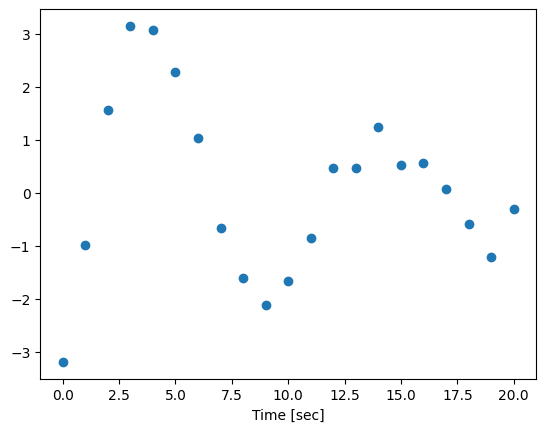

In [ ]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
# Parameters
C = 5.0
gam = 0.1
omg = 0.6
th = 0.25 * np.pi
sig = 0.3
# t=0 から 20　まで
ti = np.arange(21)
y = C*np.exp(-gam*ti)*np.sin(omg*ti-th) + sig*np.random.randn(len(ti))
plt.plot(ti,y,'o')
plt.xlabel('Time [sec]')

###ヤコブ行列

Gauss-Newton法を適用する際に面倒なのは、ヤコブ行列$\boldsymbol{J}$を求めるところです。上の減衰振動の式を各パラメータで偏微分してみると、
$$
\begin{align}
\frac{\partial f(t;\boldsymbol{\alpha})}{\partial C} &= e^{-\gamma t} \sin (\omega t - \theta) \\
\frac{\partial f(t;\boldsymbol{\alpha})}{\partial \gamma} &= -C t e^{-\gamma t} \sin (\omega t - \theta) \\
\frac{\partial f(t;\boldsymbol{\alpha})}{\partial \omega} &= C t e^{-\gamma t} \cos (\omega t - \theta) \\
\frac{\partial f(t;\boldsymbol{\alpha})}{\partial \theta} &= -C e^{-\gamma t} \cos (\omega t - \theta) \\
\end{align}
$$
となるので、ヤコブ行列の$i$行目$\boldsymbol{J}_i$は、
$$
\boldsymbol{J}_i = \left[
  \begin{matrix}
  e^{-\gamma t_i} \sin (\omega t_i - \theta) &
  -C t_i e^{-\gamma t_i} \sin (\omega t_i - \theta) &
  C t_i e^{-\gamma t_i} \cos (\omega t_i - \theta) &
  -C e^{-\gamma t_i} \cos (\omega t_i - \theta)
  \end{matrix}
  \right]
$$
となります。<font color="blue">一応、SymPy で検算してみましょう。</font>

**(注意)** SymPy は、言わば、Mathematicaの「下位互換」と言えますが、Python (IPython  ノートブック) の中で使える点は便利です。しかも無料です。


In [ ]:
import sympy as sy
ts,Csym,gamma,omega,theta = sy.symbols("t C gamma omega theta")
ys = Csym * sy.exp(- gamma * ts) *sy.sin(omega * ts - theta)
sy.Matrix([ys]).jacobian(sy.Matrix([Csym,gamma,omega,theta]))

Matrix([[exp(-gamma*t)*sin(omega*t - theta), -C*t*exp(-gamma*t)*sin(omega*t - theta), C*t*exp(-gamma*t)*cos(omega*t - theta), -C*exp(-gamma*t)*cos(omega*t - theta)]])

$f(t_i,\boldsymbol{\alpha})$と$\boldsymbol{J}_i$を計算する関数を次のように定義します。

In [ ]:
# パラメータを  a[] とする
def func(ti,a):
    y = a[0]*np.exp(-a[1]*ti)*np.sin(a[2]*ti-a[3])
    return y
# ヤコブ行列を計算する関数
def Jacobian(ti,a):
    j1 = np.exp(-a[1]*ti)*np.sin(a[2]*ti-a[3])
    j2 = - a[0]*ti*np.exp(-a[1]*ti)*np.sin(a[2]*ti-a[3])
    j3 = a[0]*ti*np.exp(-a[1]*ti)*np.cos(a[2]*ti-a[3])
    j4 = -a[0]*np.exp(-a[1]*ti)*np.cos(a[2]*ti-a[3])
    return np.array([j1,j2,j3,j4]).T

In [ ]:
a = [1.,0.,0.5,0.5]
#func(ti,a)
Jacobian(ti,a)

array([[ -0.47942554,   0.        ,   0.        ,  -0.87758256],
       [  0.        ,  -0.        ,   1.        ,  -1.        ],
       [  0.47942554,  -0.95885108,   1.75516512,  -0.87758256],
       [  0.84147098,  -2.52441295,   1.62090692,  -0.54030231],
       [  0.99749499,  -3.98997995,   0.28294881,  -0.0707372 ],
       [  0.90929743,  -4.54648713,  -2.08073418,   0.41614684],
       [  0.59847214,  -3.59083286,  -4.80686169,   0.80114362],
       [  0.14112001,  -0.98784006,  -6.92994748,   0.9899925 ],
       [ -0.35078323,   2.80626582,  -7.4916535 ,   0.93645669],
       [ -0.7568025 ,   6.81122246,  -5.88279259,   0.65364362],
       [ -0.97753012,   9.77530118,  -2.10795799,   0.2107958 ],
       [ -0.95892427,  10.54816702,   3.12028404,  -0.28366219],
       [ -0.70554033,   8.46648391,   8.50403729,  -0.70866977],
       [ -0.2794155 ,   3.63240148,  12.48221373,  -0.96017029],
       [  0.21511999,  -3.01167983,  13.67222676,  -0.97658763],
       [  0.6569866 ,  -9

あとは、適当な初期解を与え(ここでは、$\boldsymbol{\alpha}_0=[1.0, 0.0, 0.5, 0.5]$としています)、収束するまで反復計算します。

sum of squared residuals: 34.36573544301423
[4.20919328 0.25574881 0.57392799 0.75819717]
sum of squared residuals: 18.638116083628745
[ 2.99161574 -0.14318905  0.72478748  1.06618341]
sum of squared residuals: 4820.4034923538875
[ 0.97980931 -0.12432205  0.73608068  1.28251493]
sum of squared residuals: 288.53793614109037
[ 1.30016363 -0.04811912  0.76306589  1.82836166]
sum of squared residuals: 56.47507325843534
[2.49132527 0.06021026 0.70747666 1.20190818]
sum of squared residuals: 15.496247002362988
[4.44034885 0.13791936 0.60612398 0.73600052]
sum of squared residuals: 4.759265189067921
[4.55291043 0.08088868 0.59604208 0.80330964]
sum of squared residuals: 1.7542781899814213
[4.6900044  0.09689792 0.60169808 0.79938228]
sum of squared residuals: 1.1113749076071238
[4.69079525 0.09750761 0.60249716 0.79952669]
sum of squared residuals: 1.1092719378597116
[4.68944085 0.09744963 0.60250829 0.79959355]
sum of squared residuals: 1.1092686144138075
[4.68944985 0.09745037 0.60251079 0.

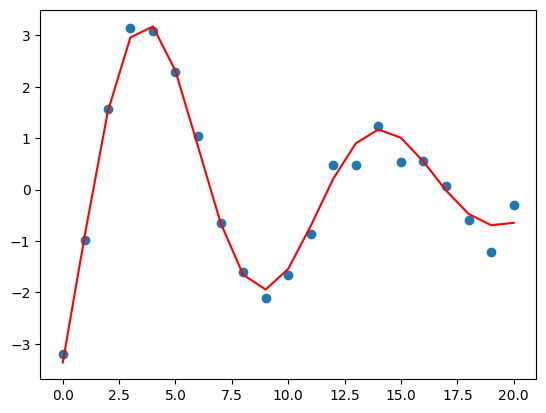

In [ ]:
# 反復計算の履歴を残すためのリスト
hist_sq = []
# パラメータ推定値の初期値を設定
alp = np.array([1.,0.,0.5,0.5])
# 収束判定のため
res = np.ones(len(ti))
for it in range(30):
    # 現在のパラメータでyを予測
    res,respre = y - func(ti,alp),res
    # 残差二乗和
    sq = np.vdot(res,res)
    hist_sq.append(sq)
    print('sum of squared residuals: {}'.format(sq))
    J = Jacobian(ti,alp)
    # ここが最大のポイント
    dlta = la.solve(np.dot(J.T,J),np.dot(J.T,res))
    alp += dlta
    print(alp)
    # 前回からの差分
    dif = res - respre
    if np.vdot(dif,dif) < 1.0e-6:
        print('Converged')
        break
# 回帰結果を使って再推定
yhat = func(ti,alp)
plt.plot(ti,y,'o')
plt.plot(ti,yhat,'r-')

In [ ]:
# 真のパラメータと比較
print("True parameter values:")
print("C={:.3f}, gamma={:.3f}, omega={:.3f}, theta={:.3f}".format(C,gam,omg,th))
print("Estimated parameter values:")
print("C={:.3f}, gamma={:.3f}, omega={:.3f}, theta={:.3f}".format(*tuple(alp)))

True parameter values:
C=5.000, gamma=0.100, omega=0.600, theta=0.785
Estimated parameter values:
C=4.689, gamma=0.097, omega=0.603, theta=0.800


残差二乗和が反復とどのように変化しているかを見てみると、最初の方は必ずしも単調に減少するわけではなく、場合によっては途中で非常に大きな残差が生じることがあります。

Text(0, 0.5, 'Residual')

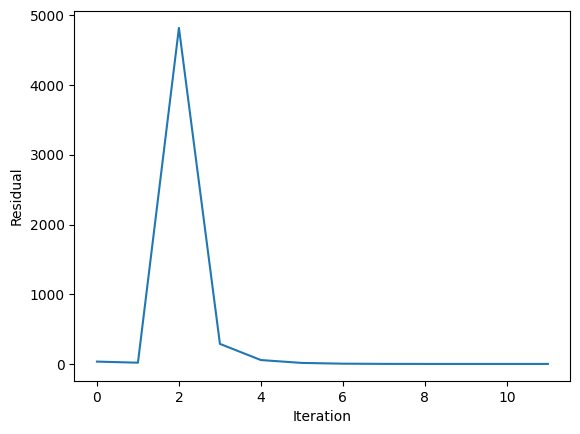

In [ ]:
# 残差二乗和の履歴
plt.plot(hist_sq)
plt.xlabel('Iteration')
plt.ylabel('Residual')

繰り返し計算の2ステップ目で、残差二乗和の値が瞬間的に大きくなっていることが分かります。

## Levenberg-Marquardt 法

Gauss-Newton 法の問題点は、ヘッセ行列の近似である、$\boldsymbol{J}^\top \boldsymbol{J}$ が非正則(逆行列を持たなくなる)に近づくと、計算が不安定になることです。
これは、前回の授業のニュートン法の説明でも話をしました。そして、その対策の一つが、<font color="red">ヘッセ行列に単位行列の定数倍を足し込んでを無理やり正則にすること</font> ($\boldsymbol{H} \rightarrow \boldsymbol{H} + \lambda \boldsymbol{I} $) でした。

この対策は、非線形最小二乗法でも有効で、<font color="blue">Gauss-Newton法の中の、$\boldsymbol{J}^\top \boldsymbol{J}$ を、$\boldsymbol{J}^\top \boldsymbol{J} + + \lambda \boldsymbol{I}$ に置き換えたものは、Levenberg-Marquardt 法</font>として知られ、定番アルゴリズムとなっています。

本当のLevenberg-Marquardt 法では、(正則化の強さを表す)$\lambda$の値をステップごとに調整するのですが、今回は、簡易版として、$\lambda$を固定値にしてやってみます。

sum of squared residuals: 34.36573544301423
[2.65098388 0.13607172 0.57396011 0.69427839]
sum of squared residuals: 17.06876135482937
[ 3.154661   -0.02390611  0.6550276   0.98579835]
sum of squared residuals: 81.29777281026804
[3.34333966 0.03076768 0.6469244  0.99201817]
sum of squared residuals: 10.342457172998914
[3.78797999 0.07269804 0.62628905 0.90061615]
sum of squared residuals: 2.4007747150028744
[4.10904641 0.08506192 0.60963038 0.83987467]
sum of squared residuals: 1.4849566952914188
[4.31084728 0.08859216 0.60572732 0.82195398]
sum of squared residuals: 1.2592143954892188
[4.44099961 0.09160737 0.60457856 0.81412666]
sum of squared residuals: 1.1728209101266729
[4.52543341 0.09357371 0.60388416 0.80923556]
sum of squared residuals: 1.136689238032332
[4.5807382  0.09487252 0.60342674 0.80601389]
sum of squared residuals: 1.1212370531881377
[4.61720333 0.09573354 0.6031221  0.80387519]
sum of squared residuals: 1.1145319875772874
[4.64135244 0.09630579 0.60291891 0.80245223]

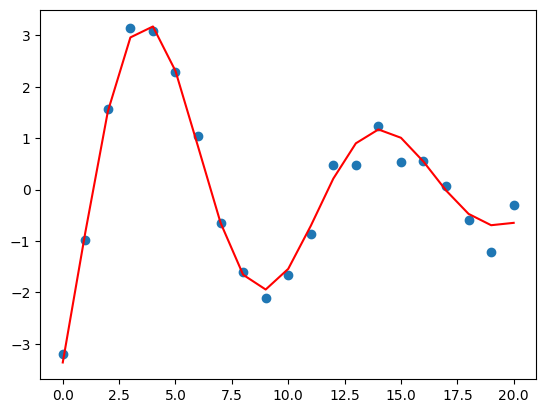

In [ ]:
# 正則化の強さ
lmd = 2.0
# 反復計算の履歴を残すためのリスト
hist_sq = []
# パラメータ推定値の初期値を設定
alp = np.array([1.,0.,0.5,0.5])
# 収束判定のため
res = np.ones(len(ti))
for it in range(30):
    # 現在のパラメータでyを予測
    res,respre = y - func(ti,alp),res
    # 残差二乗和
    sq = np.vdot(res,res)
    hist_sq.append(sq)
    print('sum of squared residuals: {}'.format(sq))
    J = Jacobian(ti,alp)
    # 一種の正則化
    H = np.dot(J.T,J)+lmd*np.eye(len(alp))
    dlta = la.solve(H,np.dot(J.T,res))
    alp += dlta
    print(alp)
    # 前回からの差分
    dif = res - respre
    if np.vdot(dif,dif) < 1.0e-6:
        print('Converged')
        break
# 回帰結果を使って再推定
yhat = func(ti,alp)
plt.plot(ti,y,'o')
plt.plot(ti,yhat,'r-')

Text(0, 0.5, 'Residual')

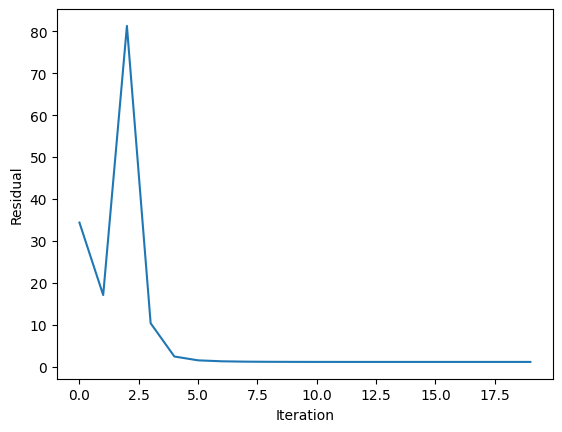

In [ ]:
# 残差二乗和の履歴
plt.plot(hist_sq)
plt.xlabel('Iteration')
plt.ylabel('Residual')

やはり、反復の2ステップ目で少し残差が大きくなりますが、Gauss-Newton法のときほど劇的ではなく、安定化されていることが分かります。

## 非線形最小二乗法の実際

基本的には、Levenberg-Marquardt法が非線形最小二乗法のデファクトスタンダードと言えます。敢えて素のGauss-Newton法を使う理由はほとんど無いと言えます。

ただし、線形の場合とは異なり、<font color="red">非線形の最小二乗法では局所解(local optima)が多数存在する</font>場合があるので、初期解を適切に与える必要があります。


## [scipy.optimize.least_squares](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html) を使うと

一応、SciPyで用意されている、非線形最小二乗法を解く関数`least_squares`を使った例も紹介します。

`least_squares`の第1引数には、残差ベクトルを計算する関数を、第2引数にはパラメータの初期値を与えます。その他オプションの引数で、使うアルゴリズムの指定や、パラメータの範囲なども指定できます。
非常に高性能ですが、オプションが多くて最初は分かりにくいかもしれません。。

下の例では、`method='lm'` というオプション引数で、アルゴリズムとしてLevenberg-Markquadt法を指定しています。

また、ヤコブ行列は有限差分法で近似的に計算されるので、パラメータに関する勾配を計算する関数を用意しておかなくても大丈夫です。


In [ ]:
from scipy.optimize import least_squares

# パラメータを引数とし、残差のベクトルを返す関数。
def residuals(alp):
  return y - func(ti,alp)

# パラメータの初期解
a0 = np.array([1.,0.,0.5,0.5])

# 非線形最小二乗法を実行
res = least_squares(residuals,a0,method='lm')

# パラメータの最小二乗解
print(res.x)

# コスト関数の値
print(res.cost)

[4.68944462 0.09745017 0.60251092 0.79960343]
0.5546343029728179


自前のLM法だと、求めた解での残差二乗和$Q(\boldsymbol{\alpha})$の値が、`1.349`
だったので、「ん？」と思うかもしれませんが、`least_squares()`のマニュアルをちゃんと読むと、コスト関数が $0.5 * Q(\boldsymbol{\alpha})$ で定義されていたので、これで良いことが分かります。


**(練習)** 距離計測による位置推定

4つの計測地点の2次元座標が、$\boldsymbol{x}_0=(100,100), \boldsymbol{x}_1=(-100,100), \boldsymbol{x}_2=(-100,-100), \boldsymbol{x}_3=(100,-100)$ だとします。これらの地点から現在地C$(\alpha_0,\alpha_1)$ までの距離を計測したところ、$\boldsymbol{y}=[134.6, 90.1, 167.7, 195.2 ]$ という値でした。これらの計測には誤差が含まれます。このとき、現在位置の座標を最小二乗法により求めてください。
すなわち、
$$
Q(\boldsymbol{\alpha}) = \sum_{i=0}^3 ( y_i - \Vert \boldsymbol{x}_i - \boldsymbol{\alpha} \Vert )^2
$$
を最小にする$\boldsymbol{\alpha}$の値を求めてください。

# 次回予告

当初の予定では、「制約あり最適化」をやることになっていましたが、ここまでで既に盛り沢山で、お腹いっぱいという人も多いと思うので、もう少し軽い(?)話題で締めようと思っています。